In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.pipeline import make_pipeline
%matplotlib inline
from sklearn.cluster import KMeans

# Ignore Warning Code
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Import data file 4
file_path = "/Users/igmark/Desktop/WGU Data Files/D212_churn_clean.csv"
df = pd.read_csv(file_path)

In [3]:
#View first 5 rows of the dataframe 
df.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,K409198,aa90260b-4141-4a24-8e36-b04ce1f4f77b,e885b299883d4f9fb18e39c75155d990,Point Baker,AK,Prince of Wales-Hyder,99927,56.25100,-133.37571,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,2,S120509,fb76459f-c047-4a9d-8af9-e0f7d4ac2524,f2de8bef964785f41a2959829830fb8a,West Branch,MI,Ogemaw,48661,44.32893,-84.24080,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3,K191035,344d114c-3736-4be5-98f7-c72c281e2d35,f1784cfa9f6d92ae816197eb175d3c71,Yamhill,OR,Yamhill,97148,45.35589,-123.24657,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,4,D90850,abfa2b40-2d43-4994-b15a-989b8c79e311,dc8a365077241bb5cd5ccd305136b05e,Del Mar,CA,San Diego,92014,32.96687,-117.24798,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,5,K662701,68a861fd-0d20-4e51-a587-8a90407ee574,aabb64a116e83fdc4befc1fbab1663f9,Needville,TX,Fort Bend,77461,29.38012,-95.80673,...,149.948316,271.493436,4,4,4,3,4,4,4,5


In [4]:
#Statistics for Continuous Variables
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [5]:
#Detect missing values 
df.isnull().sum()

CaseOrder               0
Customer_id             0
Interaction             0
UID                     0
City                    0
State                   0
County                  0
Zip                     0
Lat                     0
Lng                     0
Population              0
Area                    0
TimeZone                0
Job                     0
Children                0
Age                     0
Income                  0
Marital                 0
Gender                  0
Churn                   0
Outage_sec_perweek      0
Email                   0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
Multiple                0
OnlineSecurity          0
OnlineBackup            0
DeviceProtection        0
TechSupport             0
StreamingTV             0
StreamingMovies         0
PaperlessBilling        0
PaymentMetho

In [6]:
# Detect duplicated entries 
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [7]:
#check for outliers and remove
print(df.shape)
df = df[(np.abs(stats.zscore(df.select_dtypes(include=np.number))) < 3).all(axis=1)]
print(df.shape)

(10000, 50)
(8950, 50)


In [8]:
data_orig = df.copy()

In [9]:
#View dataset columns 
df.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'Churn',
       'Outage_sec_perweek', 'Email', 'Contacts', 'Yearly_equip_failure',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Tenure', 'MonthlyCharge',
       'Bandwidth_GB_Year', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'],
      dtype='object')

In [10]:
#Remove unnesscary columns
df=df.drop(columns=['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Churn',
       'Techie', 'Contract', 'Port_modem', 'Tablet', 'InternetService',
       'Phone', 'Multiple', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'PaymentMethod', 'Item1', 'Item2', 'Item3', 'Item4', 'Item5',
       'Item6', 'Item7', 'Item8'])

In [11]:
#View dataset columns after removal 
df.columns

Index(['Children', 'Age', 'Income', 'Outage_sec_perweek', 'Email', 'Contacts',
       'Yearly_equip_failure', 'Tenure', 'MonthlyCharge', 'Bandwidth_GB_Year'],
      dtype='object')

array([[<AxesSubplot: title={'center': 'Children'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Income'}>],
       [<AxesSubplot: title={'center': 'Outage_sec_perweek'}>,
        <AxesSubplot: title={'center': 'Email'}>,
        <AxesSubplot: title={'center': 'Contacts'}>],
       [<AxesSubplot: title={'center': 'Yearly_equip_failure'}>,
        <AxesSubplot: title={'center': 'Tenure'}>,
        <AxesSubplot: title={'center': 'MonthlyCharge'}>],
       [<AxesSubplot: title={'center': 'Bandwidth_GB_Year'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

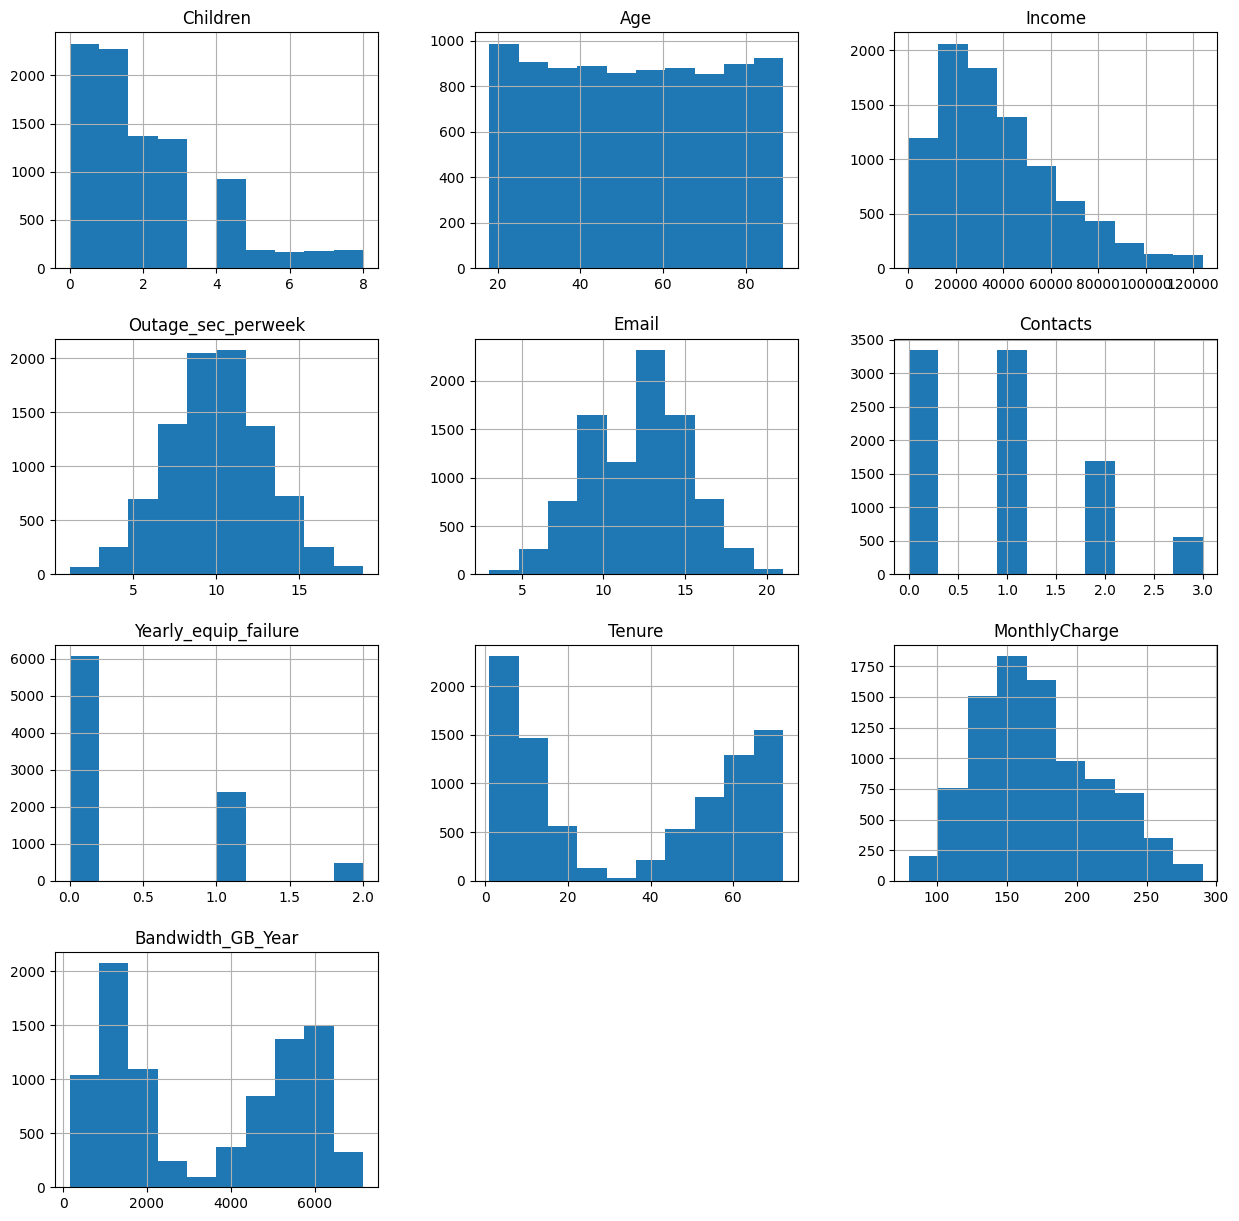

In [12]:
df.hist(figsize = (15,15))

<AxesSubplot: >

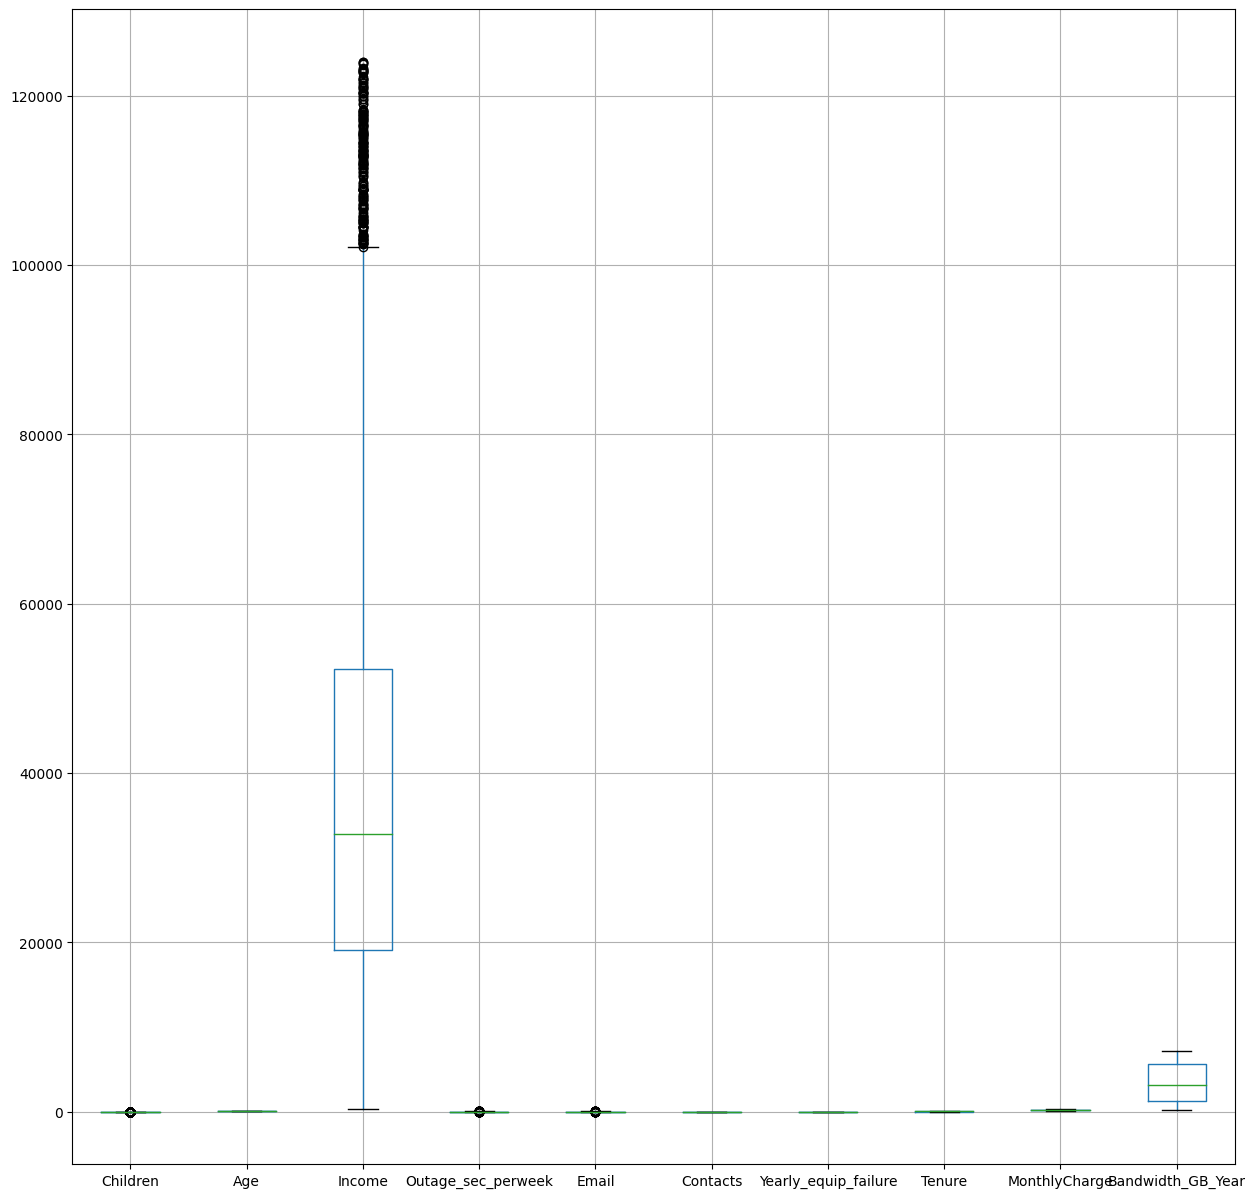

In [13]:
df.boxplot(figsize = (15,15))

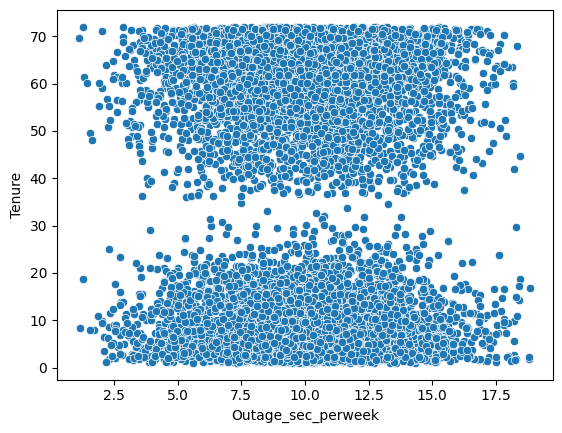

In [14]:
sns.scatterplot(x=df['Outage_sec_perweek'],y=df['Tenure'])
plt.show()

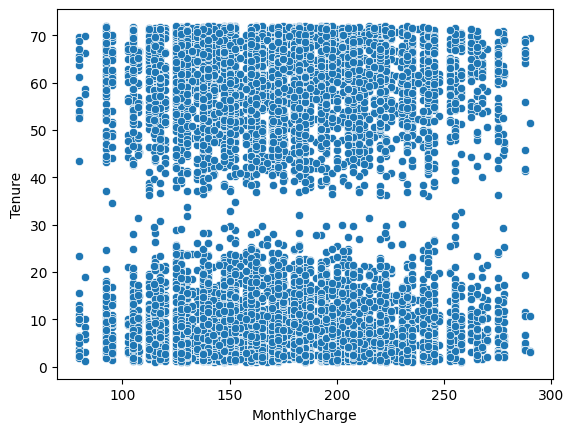

In [15]:
sns.scatterplot(x=df['MonthlyCharge'],y=df['Tenure'])
plt.show()

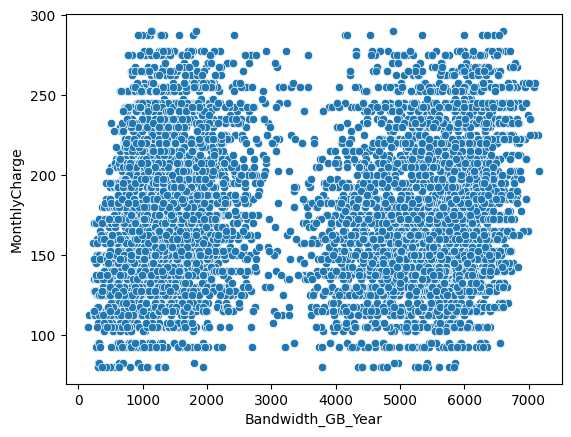

In [16]:
sns.scatterplot(x=df['Bandwidth_GB_Year'],y=df['MonthlyCharge'])
plt.show()

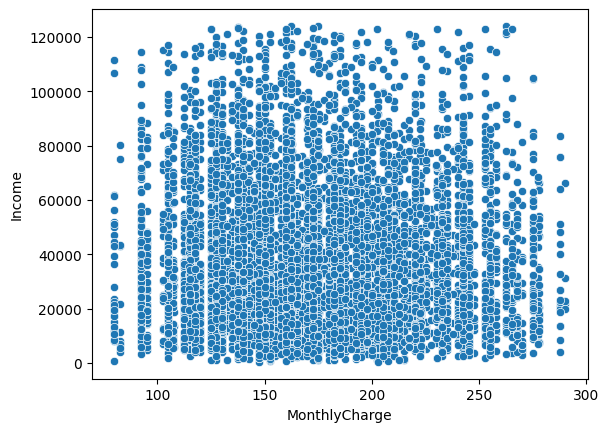

In [17]:
sns.scatterplot(x=df['MonthlyCharge'],y=df['Income'])
plt.show()

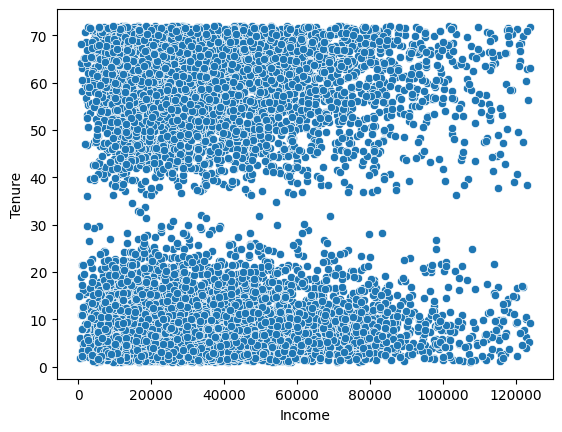

In [18]:
sns.scatterplot(x=df['Income'],y=df['Tenure'])
plt.show()

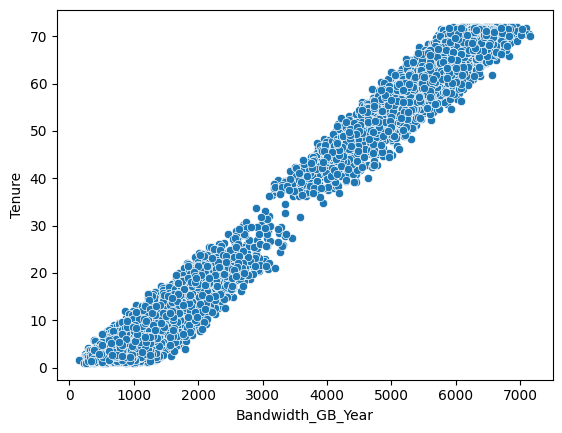

In [19]:
sns.scatterplot(x=df['Bandwidth_GB_Year'],y=df['Tenure'])
plt.show()

In [20]:
sc = StandardScaler()
sc.fit(df)
scaled_data_array = sc.transform(df)
scaled_data = pd.DataFrame(scaled_data_array, columns = df.columns)
scaled_data.head()

,Children,Age,Income,Outage_sec_perweek,Email,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
0,-0.497975,-1.267929,-0.661753,0.577519,-0.007198,-1.045438,1.072633,-1.258019,1.624861,-1.180036
1,1.088855,-0.153217,-1.143209,0.254153,-1.003385,-1.045438,1.072633,-0.706000,-0.298598,-0.606271
2,-0.497975,-0.250148,-0.772394,1.675978,0.988989,1.174939,-0.642890,-0.655588,-1.228882,-0.555988
3,-1.026918,1.446153,0.069452,-0.636170,1.321052,1.174939,1.072633,-1.238570,-0.531205,-1.422357
4,0.559911,1.446153,-0.623721,-0.542683,0.988989,2.285128,1.072633,-1.037010,0.284363,-1.070944


In [21]:
#Save to new file 
df.to_csv('D212_prepared_task1.csv')

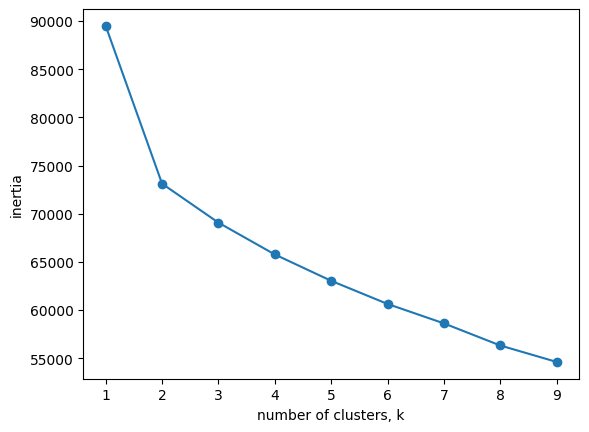

In [22]:
ks = range(1,10)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(scaled_data)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [23]:
#performs k-means clustering
model = KMeans(n_clusters=2)
model.fit(scaled_data)
print(model.labels_)

[0 0 0 ... 1 1 1]


In [24]:
#coordinates of the centers of the clusters obtained after fitting the KMeans model on the data. 
model.cluster_centers_

array([[ 7.17174032e-03, -1.31626119e-02, -3.56851777e-03,
        -2.51602777e-03,  1.58764899e-02,  2.16316223e-04,
        -4.82227486e-03, -9.57378882e-01,  9.29481195e-04,
        -9.49037277e-01],
       [-7.21998072e-03,  1.32511497e-02,  3.59252125e-03,
         2.53295172e-03, -1.59832825e-02, -2.17771265e-04,
         4.85471169e-03,  9.63818650e-01, -9.35733310e-04,
         9.55420936e-01]])

In [25]:
#add a new column named 'label_' 
data_orig['label_'] = model.labels_

In [26]:
# count the number of customers with a specific cluster label (0) and who also have churned in orginal df
data_orig.query('label_==0 and Churn=="Yes"').Customer_id.count()

2139

In [27]:
#total number of customers who have churned
data_orig.query('Churn=="Yes"').Customer_id.count()

2386

In [28]:
#Confusion Maxtrix
y_actual = data_orig['Churn'].apply(lambda x: 1 if x=='No' else 0)
y_pred = data_orig['label_']
metrics.confusion_matrix(y_actual, y_pred)

array([[2139,  247],
       [2350, 4214]])

In [29]:
#computes the accuracy classification score
metrics.accuracy_score(y_actual, y_pred)

0.7098324022346368

In [30]:
#fits a KMeans clustering model with 2 variables
model = KMeans(n_clusters=2)
model.fit(df[['Tenure','MonthlyCharge']])

KMeans(n_clusters=2)

In [31]:
#predict the cluster label of each data point
labels = model.predict(df[['Tenure','MonthlyCharge']])

In [32]:
#adds a new column 'cluster' to the dataframe 'df' 
df['cluster'] = labels
print(df[['Tenure','MonthlyCharge','cluster']])

         Tenure  MonthlyCharge  cluster
1      1.156681     242.632554        1
2     15.754144     159.947583        0
3     17.087227     119.956840        0
4      1.670972     149.948316        0
5      7.000994     185.007692        1
...         ...            ...      ...
9994  49.921560     142.482700        0
9995  68.197130     159.979400        0
9997  47.416890     169.974100        0
9998  71.095600     252.624000        1
9999  63.350860     217.484000        1

[8950 rows x 3 columns]


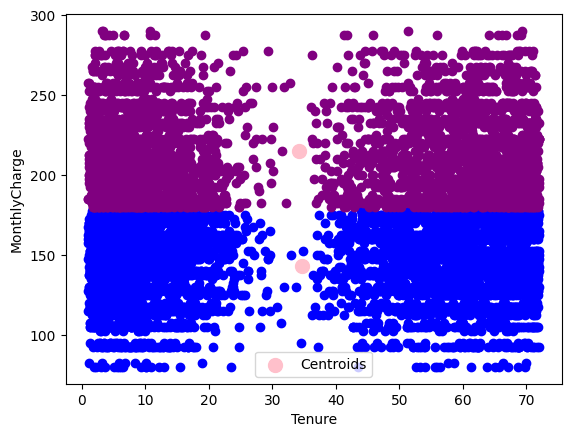

In [33]:
#Scatterplot of Tenure and MonthlyCharge
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

plt.scatter(df1.Tenure, df1['MonthlyCharge'],color='blue')
plt.scatter(df2.Tenure, df2['MonthlyCharge'],color='purple')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'pink', label = 'Centroids')

plt.xlabel('Tenure')
plt.ylabel('MonthlyCharge')
plt.legend()

         Tenure  Bandwidth_GB_Year  cluster
1      1.156681         800.982766        0
2     15.754144        2054.706961        0
3     17.087227        2164.579412        0
4      1.670972         271.493436        0
5      7.000994        1039.357983        0
...         ...                ...      ...
9994  49.921560        4945.756430        1
9995  68.197130        6511.252601        1
9997  47.416890        4159.305799        1
9998  71.095600        6468.456752        1
9999  63.350860        5857.586167        1

[8950 rows x 3 columns]


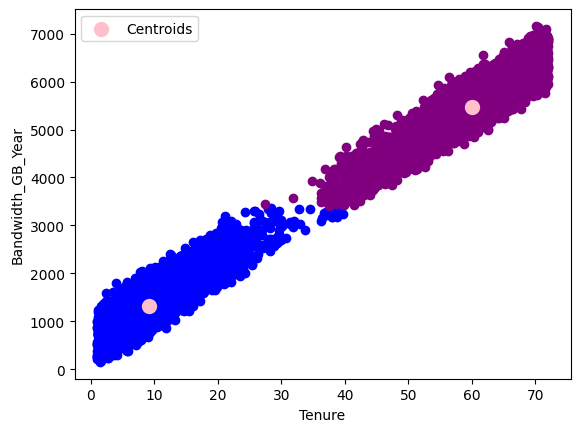

In [34]:
#performs K-means clustering on the 'Tenure' and 'Bandwidth_GB_Year' 
model = KMeans(n_clusters=2)
model.fit(df[['Tenure','Bandwidth_GB_Year']])

#predicts the cluster labels for each data point using the trained K-means model

labels = model.predict(df[['Tenure','Bandwidth_GB_Year']])
df['cluster'] = labels
print(df[['Tenure','Bandwidth_GB_Year','cluster']])
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

#Scatterplot 
plt.scatter(df1.Tenure, df1['Bandwidth_GB_Year'],color='blue')
plt.scatter(df2.Tenure, df2['Bandwidth_GB_Year'],color='purple')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'pink', label = 'Centroids')

plt.xlabel('Tenure')
plt.ylabel('Bandwidth_GB_Year')
plt.legend()

      MonthlyCharge  Bandwidth_GB_Year  cluster
1        242.632554         800.982766        0
2        159.947583        2054.706961        0
3        119.956840        2164.579412        0
4        149.948316         271.493436        0
5        185.007692        1039.357983        0
...             ...                ...      ...
9994     142.482700        4945.756430        1
9995     159.979400        6511.252601        1
9997     169.974100        4159.305799        1
9998     252.624000        6468.456752        1
9999     217.484000        5857.586167        1

[8950 rows x 3 columns]


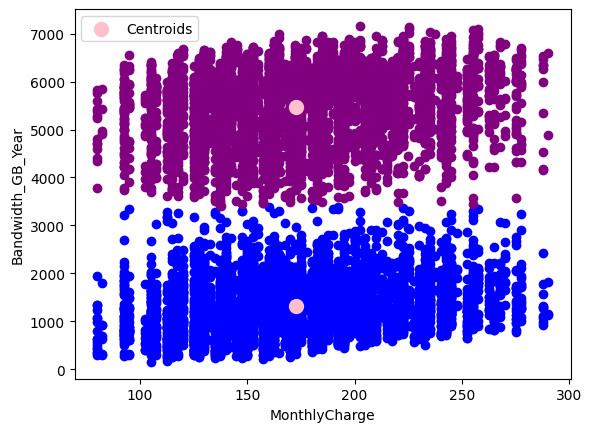

In [35]:
#k-means clustering on the 'MonthlyCharge' and 'Bandwidth_GB_Year' 
model = KMeans(n_clusters=2)
model.fit(df[['MonthlyCharge','Bandwidth_GB_Year']])
labels = model.predict(df[['MonthlyCharge','Bandwidth_GB_Year']])
df['cluster'] = labels
print(df[['MonthlyCharge','Bandwidth_GB_Year','cluster']])
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

plt.scatter(df1.MonthlyCharge, df1['Bandwidth_GB_Year'],color='blue')
plt.scatter(df2.MonthlyCharge, df2['Bandwidth_GB_Year'],color='purple')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'pink', label = 'Centroids')

plt.xlabel('MonthlyCharge')
plt.ylabel('Bandwidth_GB_Year')
plt.legend()

        Income  MonthlyCharge  cluster
1     21704.77     242.632554        0
2      9609.57     159.947583        0
3     18925.23     119.956840        0
4     40074.19     149.948316        0
5     22660.20     185.007692        0
...        ...            ...      ...
9994  56384.35     142.482700        1
9995  55723.74     159.979400        1
9997  45983.43     169.974100        0
9998  16667.58     252.624000        0
9999   9020.92     217.484000        0

[8950 rows x 3 columns]


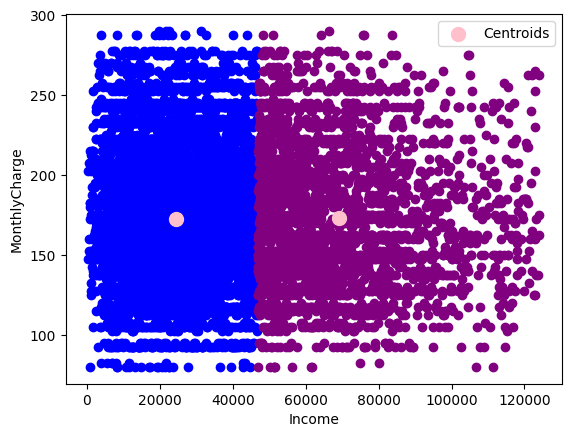

In [36]:
#k-means clustering on Income and MonthlyCharges
model = KMeans(n_clusters=2)
model.fit(df[['Income','MonthlyCharge']])
labels = model.predict(df[['Income','MonthlyCharge']])
df['cluster'] = labels
print(df[['Income','MonthlyCharge','cluster']])
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]

plt.scatter(df1.Income, df1['MonthlyCharge'],color='blue')
plt.scatter(df2.Income, df2['MonthlyCharge'],color='purple')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, c = 'pink', label = 'Centroids')

plt.xlabel('Income')
plt.ylabel('MonthlyCharge')
plt.legend()